In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from pyfonts import load_google_font
from highlight_text import ax_text

df = pd.read_csv('share-of-people-who-think-homosexuality-is-never-justified.csv')

In [113]:
# Create a subset of countries and years from the viz
df = (df.loc[(df['Entity'].isin(countries)) & (df['Year'].isin(years)),
 ['Entity','Year','Homosexuality: Never justifiable (aggregate)']])

countries = {'United States': '#b13507', 
        'Spain': '#4c6a9c',
        'United Kingdom': '#996d39', 
        'Sweden': '#2c8465', 
        'Netherlands': '#6d3e91'}

years = [1984, 2022]

fonts = {'title' : load_google_font('Playfair Display'), 
         'labels_reg': load_google_font('Libre Franklin'),
         'labels_bold': load_google_font('Libre Franklin', weight = 'bold')} 

df.head(3)

,Entity,Year,Homosexuality: Never justifiable (aggregate)
408,Netherlands,1984,33.899180
413,Netherlands,2022,6.166164
571,Spain,1984,69.569140


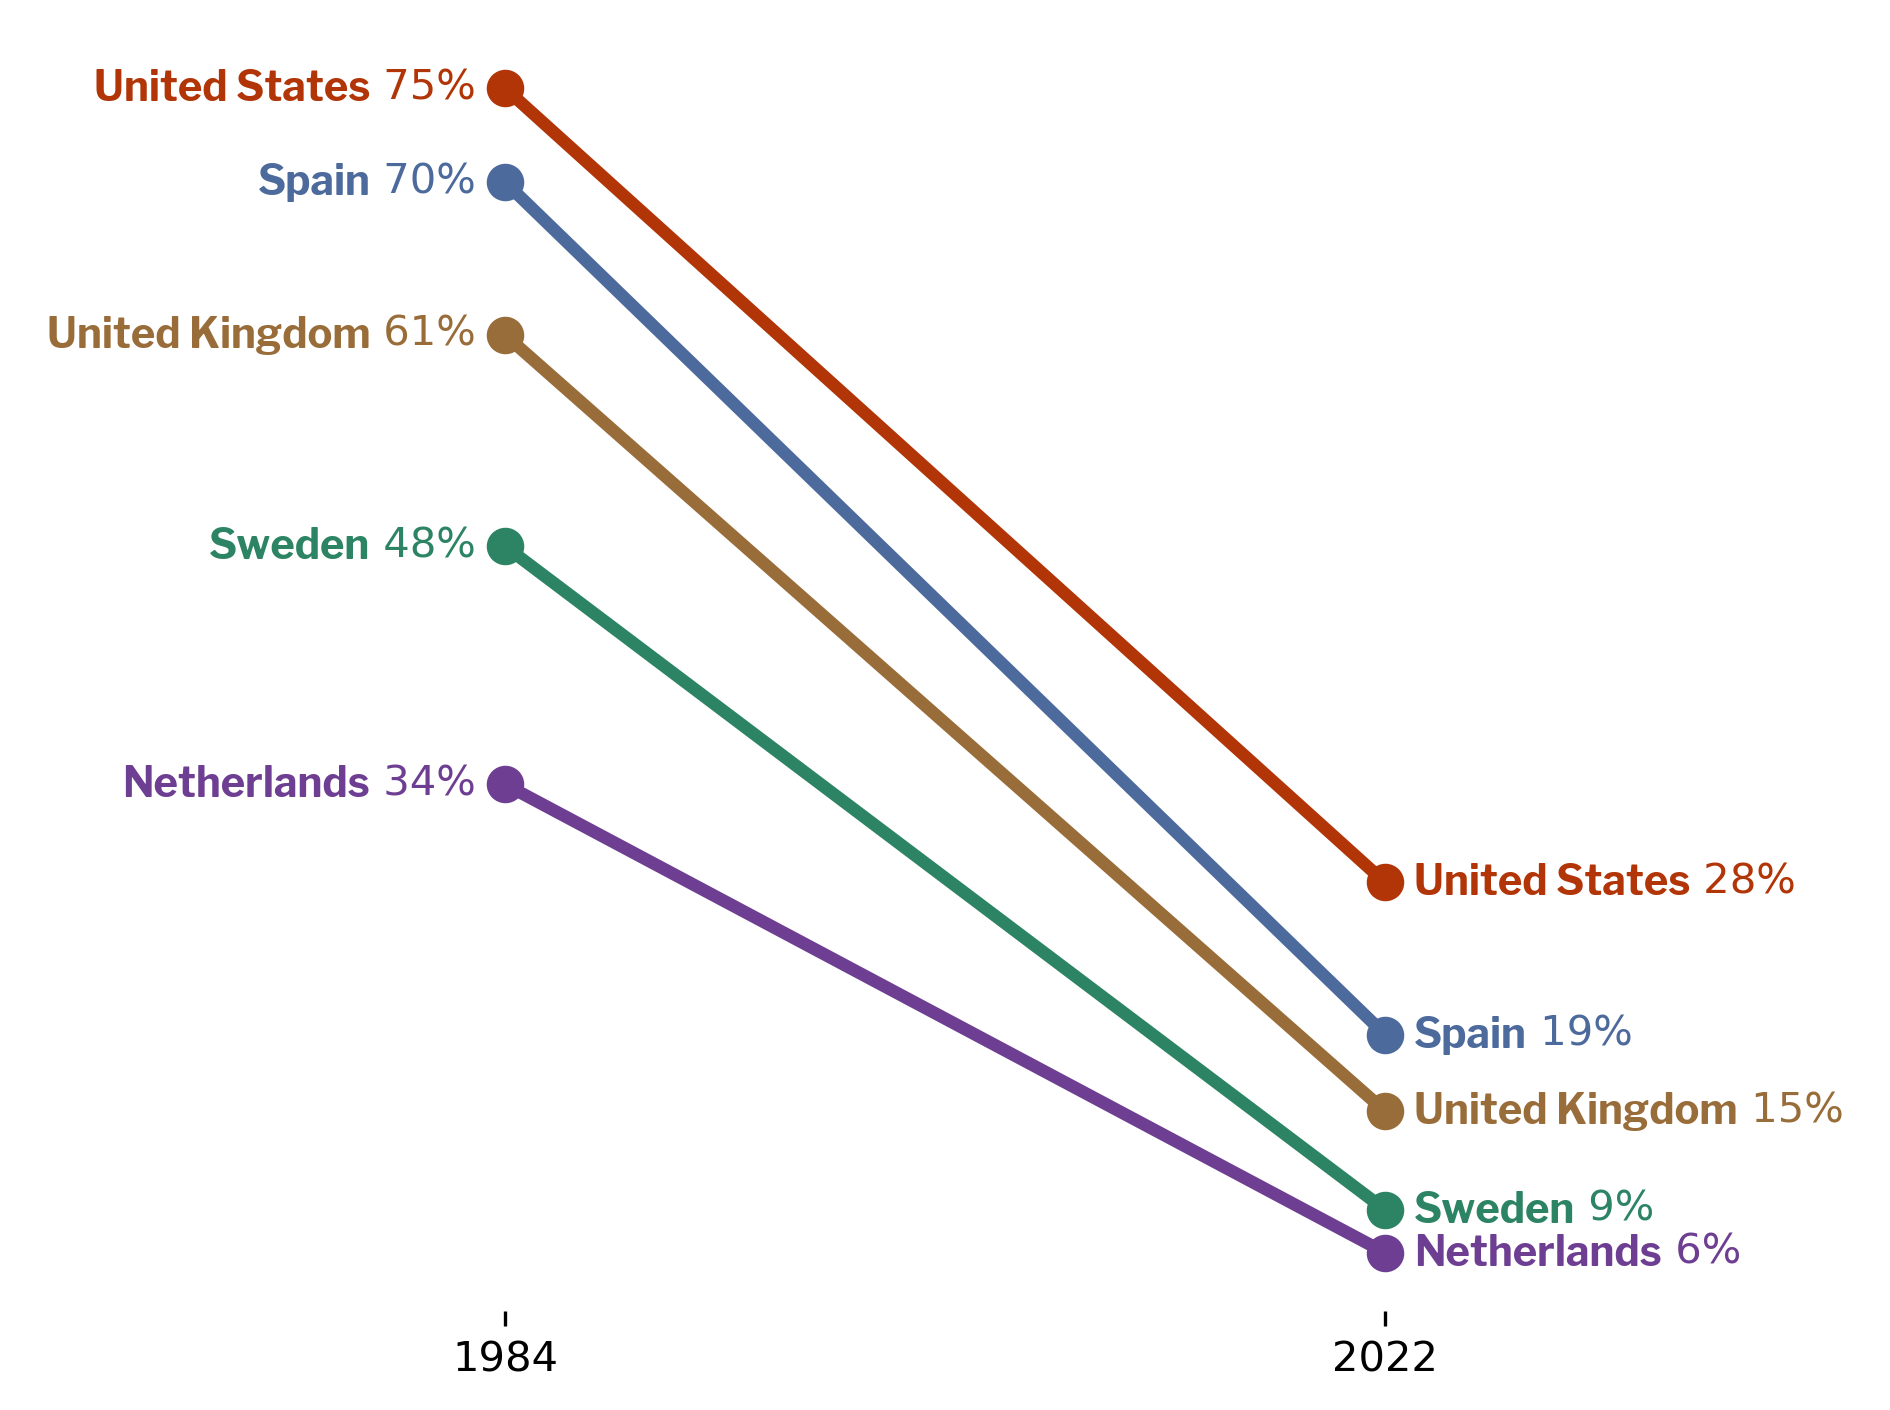

In [115]:
fig, ax = plt.subplots(dpi = 300, layout = 'tight')

for country in countries:
    past = df.loc[(df['Entity'] == country) & (df['Year'] == 1984), 'Homosexuality: Never justifiable (aggregate)']
    present = df.loc[(df['Entity'] == country) & (df['Year'] == 2022), 'Homosexuality: Never justifiable (aggregate)']
    
    ax.plot(years, 
            [past, present],
           color = countries[country],
           linewidth = 3,
           marker = 'o', markersize = 8)
    
    ax_text(x = years[0] - 1.25, y = past,
           s = f'<{country}> {round(float(past.iloc[0]))}%',
           highlight_textprops= [{'font' : fonts['labels_bold']}],
            ha = 'right', va = 'center',
            color = countries[country])

    ax_text(x = years[1] + 1.25, y = present,
            s = f'<{country}> {round(float(present.iloc[0]))}%', 
            highlight_textprops= [{'font' : fonts['labels_bold']}],
            ha = 'left', va = 'center',
            color = countries[country])

ax.spines[:].set_visible(False)
ax.set_yticks([])
ax.set_xticks(years)
plt.show()

In [ ]:
# add v lines
#move years ticks to top
# add footer
# add title
